In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff #This can create interactive plots
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo 

In [203]:
# fetch dataset 
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878) 
  
# data (as pandas dataframes) 
X = cirrhosis_patient_survival_prediction.data.features 
y = cirrhosis_patient_survival_prediction.data.targets 
  
df_cancer = pd.concat([X, y], axis=1)
print(df_cancer) 


                Drug    Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
0    D-penicillamine  21464   F       Y            Y       Y     Y       14.5   
1    D-penicillamine  20617   F       N            Y       Y     N        1.1   
2    D-penicillamine  25594   M       N            N       N     S        1.4   
3    D-penicillamine  19994   F       N            Y       Y     S        1.8   
4            Placebo  13918   F       N            Y       Y     N        3.4   
..               ...    ...  ..     ...          ...     ...   ...        ...   
413              NaN  24472   F     NaN          NaN     NaN     N        1.2   
414              NaN  14245   F     NaN          NaN     NaN     N        0.9   
415              NaN  20819   F     NaN          NaN     NaN     N        1.6   
416              NaN  21185   F     NaN          NaN     NaN     N        0.8   
417              NaN  19358   F     NaN          NaN     NaN     N        0.7   

    Cholesterol  Albumin Co

In [204]:
df_cancer.head().T

,0,1,2,3,4
Drug,D-penicillamine,D-penicillamine,D-penicillamine,D-penicillamine,Placebo
Age,21464,20617,25594,19994,13918
Sex,F,F,M,F,F
Ascites,Y,N,N,N,N
Hepatomegaly,Y,Y,N,Y,Y
Spiders,Y,Y,N,Y,Y
Edema,Y,N,S,S,N
Bilirubin,14.5,1.1,1.4,1.8,3.4
Cholesterol,261,302,176,244,279
Albumin,2.6,4.14,3.48,2.54,3.53


In [205]:
df_cancer.shape

(418, 18)

In [206]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Drug           313 non-null    object 
 1   Age            418 non-null    int64  
 2   Sex            418 non-null    object 
 3   Ascites        313 non-null    object 
 4   Hepatomegaly   313 non-null    object 
 5   Spiders        313 non-null    object 
 6   Edema          418 non-null    object 
 7   Bilirubin      418 non-null    float64
 8   Cholesterol    312 non-null    object 
 9   Albumin        418 non-null    float64
 10  Copper         312 non-null    object 
 11  Alk_Phos       312 non-null    float64
 12  SGOT           312 non-null    float64
 13  Tryglicerides  312 non-null    object 
 14  Platelets      411 non-null    object 
 15  Prothrombin    416 non-null    float64
 16  Stage          412 non-null    float64
 17  Status         418 non-null    object 
dtypes: float64

In [207]:
df_cancer.duplicated() 
df_cancer.duplicated().sum()

np.int64(0)

In [208]:
missing_count = df_cancer.isnull().sum()
missing_percentage = (df_cancer.isnull().sum() / len(df_cancer)) * 100
print(missing_percentage)

Drug             25.119617
Age               0.000000
Sex               0.000000
Ascites          25.119617
Hepatomegaly     25.119617
Spiders          25.119617
Edema             0.000000
Bilirubin         0.000000
Cholesterol      25.358852
Albumin           0.000000
Copper           25.358852
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    25.358852
Platelets         1.674641
Prothrombin       0.478469
Stage             1.435407
Status            0.000000
dtype: float64


In [209]:
df_copy_cancer=df_cancer.copy()
#using mode to handle missing value
mode_Stagevalue = df_copy_cancer['Stage'].mode()[0]
df_copy_cancer['Stage'] = df_copy_cancer['Stage'].fillna(mode_Stagevalue)
mode_Plateletsvalue = df_copy_cancer['Platelets'].mode()[0]
df_copy_cancer['Platelets'] = df_copy_cancer['Platelets'].fillna(mode_Plateletsvalue)
mode_drugvalue = df_copy_cancer['Drug'].mode()[0]
df_copy_cancer['Drug'] = df_copy_cancer['Drug'].fillna(mode_drugvalue)
mode_Ascitesvalue = df_copy_cancer['Ascites'].mode()[0]
df_copy_cancer['Ascites'] = df_copy_cancer['Ascites'].fillna(mode_Ascitesvalue)
mode_Hepatomegalyvalue = df_copy_cancer['Hepatomegaly'].mode()[0]
df_copy_cancer['Hepatomegaly'] = df_copy_cancer['Hepatomegaly'].fillna(mode_Hepatomegalyvalue)
mode_Spidersvalue = df_copy_cancer['Spiders'].mode()[0]
df_copy_cancer['Spiders'] = df_copy_cancer['Spiders'].fillna(mode_Spidersvalue)
#using median to handle missing value
median_Prothrombinvalue = df_copy_cancer['Prothrombin'].median()
df_copy_cancer['Prothrombin'] = df_copy_cancer['Prothrombin'].fillna(median_Prothrombinvalue)

1. 
2. 
3. 
4. correlation heatmap
5. find out the outliers use boxplot

In [210]:
#use MICE handle missing values
# 1. 重新定義：只納入數值型高遺失率欄位
mice_numeric_cols = [
    'Cholesterol',
    'Copper',
    'Alk_Phos',
    'SGOT',
    'Tryglicerides'
]

# 2. 確保數值型態 (針對我們要處理的欄位)
# 將任何無法識別的字串轉換為 np.nan
for col in mice_numeric_cols:
    df_copy_cancer[col] = pd.to_numeric(df_copy_cancer[col], errors='coerce')

# 3. 初始化 MICE 估算器
imputer = IterativeImputer(
    max_iter=10,
    random_state=42
)

data_to_impute = df_copy_cancer[mice_numeric_cols].values 
imputed_data = imputer.fit_transform(data_to_impute)

df_copy_cancer[mice_numeric_cols] = imputed_data 


In [211]:
missing_count = df_copy_cancer.isnull().sum()
missing_percentage = (df_copy_cancer.isnull().sum() / len(df_copy_cancer)) * 100
print(missing_percentage)

Drug             0.0
Age              0.0
Sex              0.0
Ascites          0.0
Hepatomegaly     0.0
Spiders          0.0
Edema            0.0
Bilirubin        0.0
Cholesterol      0.0
Albumin          0.0
Copper           0.0
Alk_Phos         0.0
SGOT             0.0
Tryglicerides    0.0
Platelets        0.0
Prothrombin      0.0
Stage            0.0
Status           0.0
dtype: float64


In [212]:
df_copy_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Drug           418 non-null    object 
 1   Age            418 non-null    int64  
 2   Sex            418 non-null    object 
 3   Ascites        418 non-null    object 
 4   Hepatomegaly   418 non-null    object 
 5   Spiders        418 non-null    object 
 6   Edema          418 non-null    object 
 7   Bilirubin      418 non-null    float64
 8   Cholesterol    418 non-null    float64
 9   Albumin        418 non-null    float64
 10  Copper         418 non-null    float64
 11  Alk_Phos       418 non-null    float64
 12  SGOT           418 non-null    float64
 13  Tryglicerides  418 non-null    float64
 14  Platelets      418 non-null    object 
 15  Prothrombin    418 non-null    float64
 16  Stage          418 non-null    float64
 17  Status         418 non-null    object 
dtypes: float64

In [213]:
df_copy_cancer.head().T

,0,1,2,3,4
Drug,D-penicillamine,D-penicillamine,D-penicillamine,D-penicillamine,Placebo
Age,21464,20617,25594,19994,13918
Sex,F,F,M,F,F
Ascites,Y,N,N,N,N
Hepatomegaly,Y,Y,N,Y,Y
Spiders,Y,Y,N,Y,Y
Edema,Y,N,S,S,N
Bilirubin,14.5,1.1,1.4,1.8,3.4
Cholesterol,261.0,302.0,176.0,244.0,279.0
Albumin,2.6,4.14,3.48,2.54,3.53


In [214]:
df_copy_cancer['Drug'].value_counts()
#df_cancer['Drug'].nunique()

Drug
D-penicillamine    263
Placebo            154
NaNN                 1
Name: count, dtype: int64

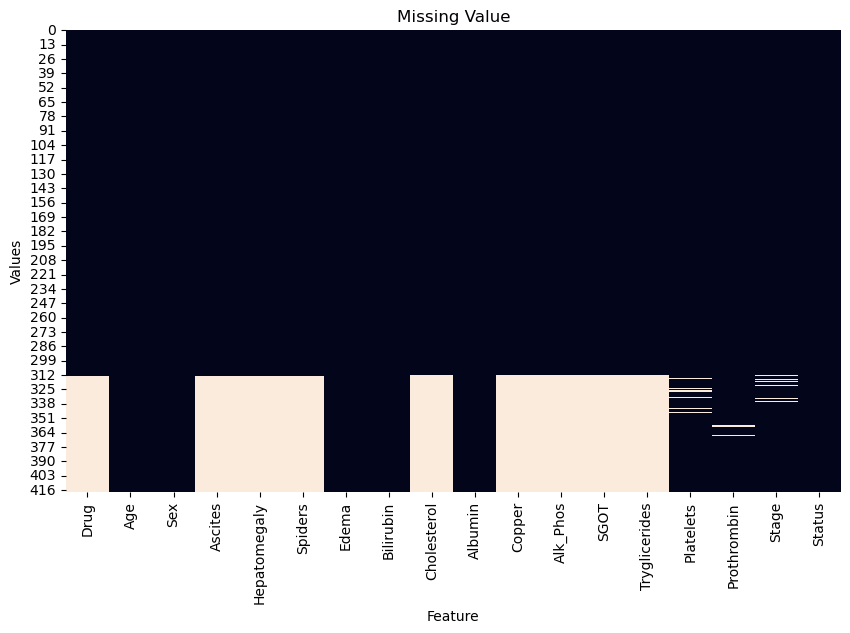

In [215]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cancer.isnull(), cbar=False)
plt.title("Missing Value")
plt.xlabel("Feature")
plt.ylabel("Values")
plt.show()

In [216]:
df_copy_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,418.0,18533.351675,3815.845055,9598.00,15644.500000,18628.000000,21272.500000,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.800000,1.400000,3.400000,28.00
Cholesterol,418.0,367.724944,192.062818,120.00,268.662604,367.724944,368.248969,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.242500,3.530000,3.770000,4.64
Copper,418.0,97.594323,73.701343,4.00,51.250000,97.594323,100.750000,588.00
Alk_Phos,418.0,1982.655769,1848.437803,289.00,1016.250000,1717.000000,1982.655769,13862.40
SGOT,418.0,122.556346,48.965657,26.35,91.000000,122.556346,135.750000,457.25
Tryglicerides,418.0,124.237597,53.629469,33.00,95.000000,124.237597,132.500000,598.00
Prothrombin,418.0,10.731100,1.019587,9.00,10.000000,10.600000,11.100000,18.00
Stage,418.0,3.023923,0.875678,1.00,2.000000,3.000000,4.000000,4.00


In [217]:
df_copy_cancer['Sex'].value_counts(normalize=True)

Sex
F    0.894737
M    0.105263
Name: proportion, dtype: float64

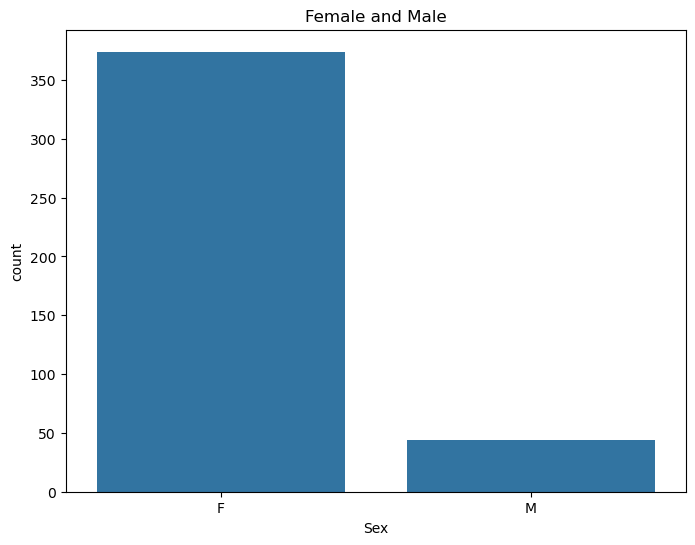

In [218]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy_cancer, x='Sex')
plt.title("Female and Male")
plt.show()

In [219]:
age_column_name = 'Age'
df_copy_cancer['Age'] = df_copy_cancer[age_column_name] / 365
df_copy_cancer['Age_year'] = np.round(df_copy_cancer['Age'] / 10) * 10

In [220]:
df_copy_cancer.head().T

,0,1,2,3,4
Drug,D-penicillamine,D-penicillamine,D-penicillamine,D-penicillamine,Placebo
Age,58.805479,56.484932,70.120548,54.778082,38.131507
Sex,F,F,M,F,F
Ascites,Y,N,N,N,N
Hepatomegaly,Y,Y,N,Y,Y
Spiders,Y,Y,N,Y,Y
Edema,Y,N,S,S,N
Bilirubin,14.5,1.1,1.4,1.8,3.4
Cholesterol,261.0,302.0,176.0,244.0,279.0
Albumin,2.6,4.14,3.48,2.54,3.53


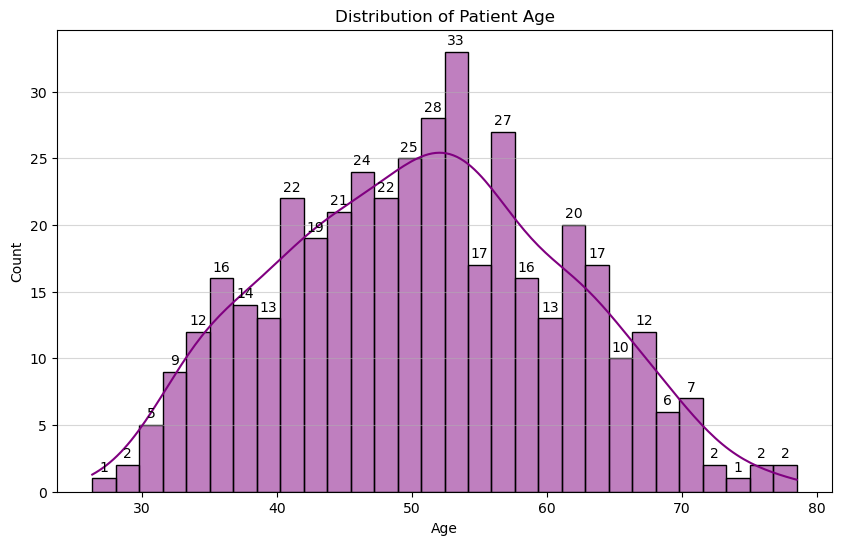

In [222]:
plt.figure(figsize=(10, 6))
ax_plots=sns.histplot(
    data=df_copy_cancer,
    kde=True, #adding curve in plot
    x='Age',  
    bins=30,  
    color='purple',
    edgecolor='black'
)
for num in ax_plots.containers: #containers is Matplotlib of property 
    labels = [int(h) for h in num.datavalues] #datavalues also a Metaplotlib of property
    non_zero_labels = [str(y) if y > 0 else '' for y in labels]#turn int to str, so we can let 0 became space
    ax_plots.bar_label(num, non_zero_labels, padding=3) #padding=3 means leave distance of 3 units
        
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True, axis='y', alpha=0.5)
plt.show()

This dataset has lots of wrong types, so it need to be transered.資料型別有很多錯誤